# Data Exploration

In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


%matplotlib inline

height has been deprecated.



### Read files from local disk

In [44]:
df = pd.read_csv('TrainingDataset.csv')

### Plot sales trend

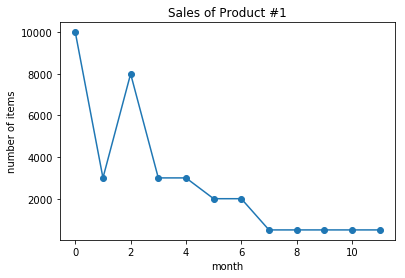

In [91]:
plt.plot(df.iloc[0,:12].values,'o-')
#df.iloc[:,:12].median().plot()
plt.xlabel('month')
plt.ylabel('number of items')
plt.title("Sales of Product #1")
plt.show()

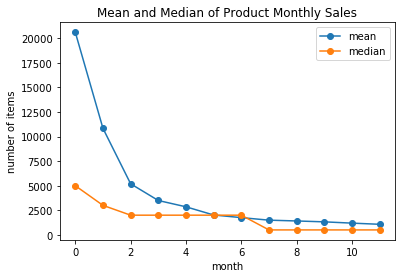

In [92]:
plt.plot(df.iloc[:,:12].mean().values,'o-', label='mean')
plt.plot(df.iloc[:,:12].median().values,'o-', label='median')
#df.iloc[:,:12].median().plot()
plt.xlabel('month')
plt.ylabel('number of items')
plt.title("Mean and Median of Product Monthly Sales")
plt.legend()
plt.show()

### Plot quantitavie variable distributions

In [46]:
# identify categorical variables and quant variables
cat_cols = [i for i in df.columns if 'Cat' in i]
quan_cols = [i for i in df.columns if 'Quan' in i]
len(quan_cols)

31

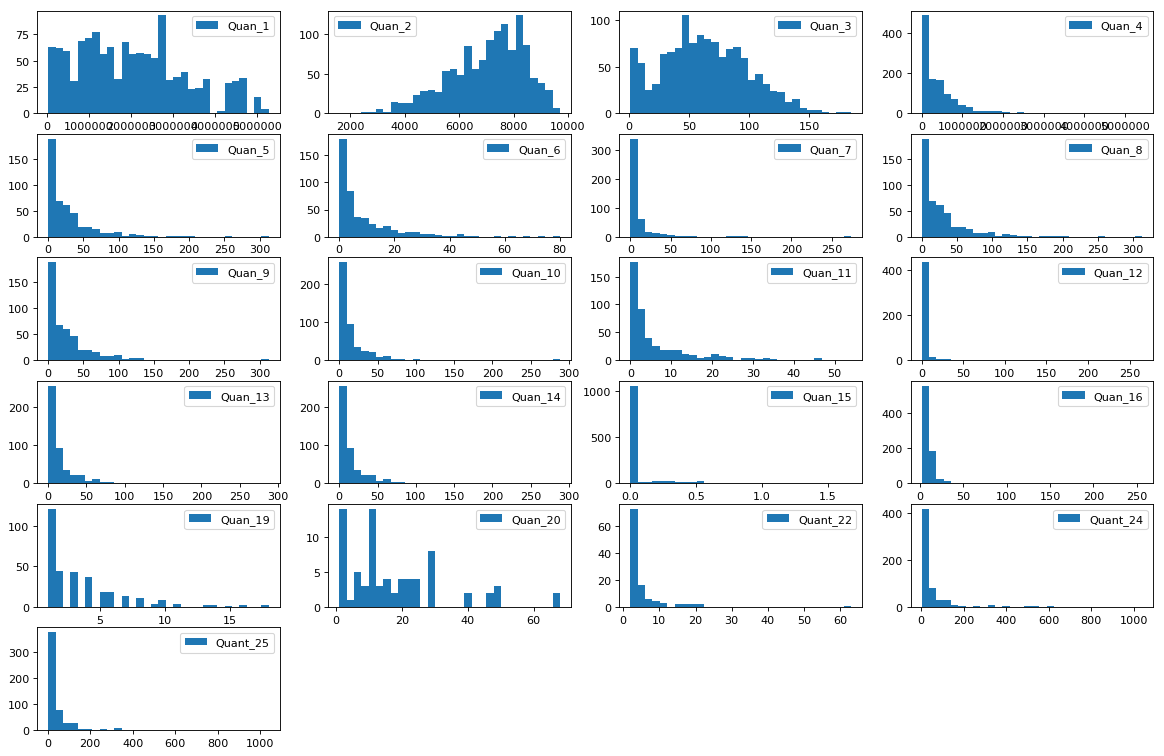

In [97]:
# find quan variables that do not follow gaussian or uniform distributions.
# usually these variables are long-tail distribution. They can be transformed to gaussian distribution by "numpy.log1p"

df_train = pd.read_csv('TrainingDataset.csv').iloc[:, 12:]
df_test = pd.read_csv('TestDataset.csv').iloc[:, 1:]
df = pd.concat([df_train, df_test])

plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for i, col in enumerate(quan_cols):
    a = df[col]
    plt.subplot(8,4,i+1)
    plt.hist(a[~a.isnull()], bins=30, label=col)
    plt.legend()


plt.show()

In [98]:
# long tail columns are:
quan_log_cols = ["Quan_4", "Quan_5", "Quan_6", "Quan_7", "Quan_8", "Quan_9", 
                 "Quan_10", "Quan_11", "Quan_12", "Quan_13", "Quan_14", "Quan_15", 
                 "Quan_16", "Quan_19", "Quan_27", "Quan_28", "Quan_29", "Quant_22", 
                 "Quant_24", "Quant_25"]


# quan to cat
quan2cat_cols = ["Quan_17", "Quan_18", "Quan_21", "Quan_22", "Quant_23", "Quan_26", 
                 "Quan_27", "Quan_28", "Quan_29", "Quan_30"]

### Plot correlations between features

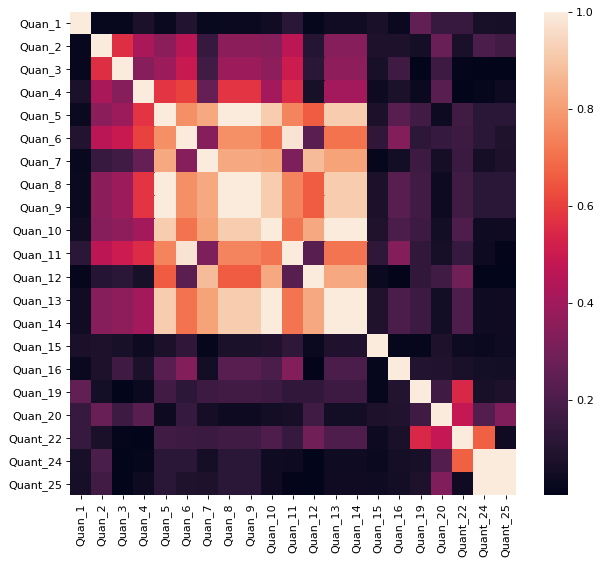

In [99]:
df.loc[:,quan_log_cols].fillna(df[quan_log_cols].median(), inplace=True)
df.loc[:,quan2cat_cols] = df.loc[:,quan2cat_cols].astype(str)

cat_cols = [i for i in df.columns if 'Cat' in i]
quan_cols = [i for i in df.columns if 'Quan' in i and i not in quan2cat_cols]

corr = np.abs(df.loc[:,quan_cols].corr())
plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)